<a href="https://colab.research.google.com/github/mcnamiker/Portfolio/blob/main/Costof_Materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
pip install pandas numpy keras tensorflow

In [38]:
from google.colab import files
 
 
uploaded = files.upload()

Saving national_house_construction_cost_index_0.csv to national_house_construction_cost_index_0 (1).csv


In [39]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['national_house_construction_cost_index_0.csv']))
df.shape

(266, 2)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [61]:
df.head()

,Date,Cost
Date,,
1994-01-01,1994-01-01,109.2
1994-01-02,1994-01-02,109.3
1994-01-03,1994-01-03,109.4
1994-01-04,1994-01-04,110.3
1994-01-05,1994-01-05,110.1


In [68]:
df["Date"] = pd.to_datetime(df.Date, format="%d/%m/%Y")
df.dtypes

Date    datetime64[ns]
Cost           float64
dtype: object

In [63]:
df.index = df['Date']

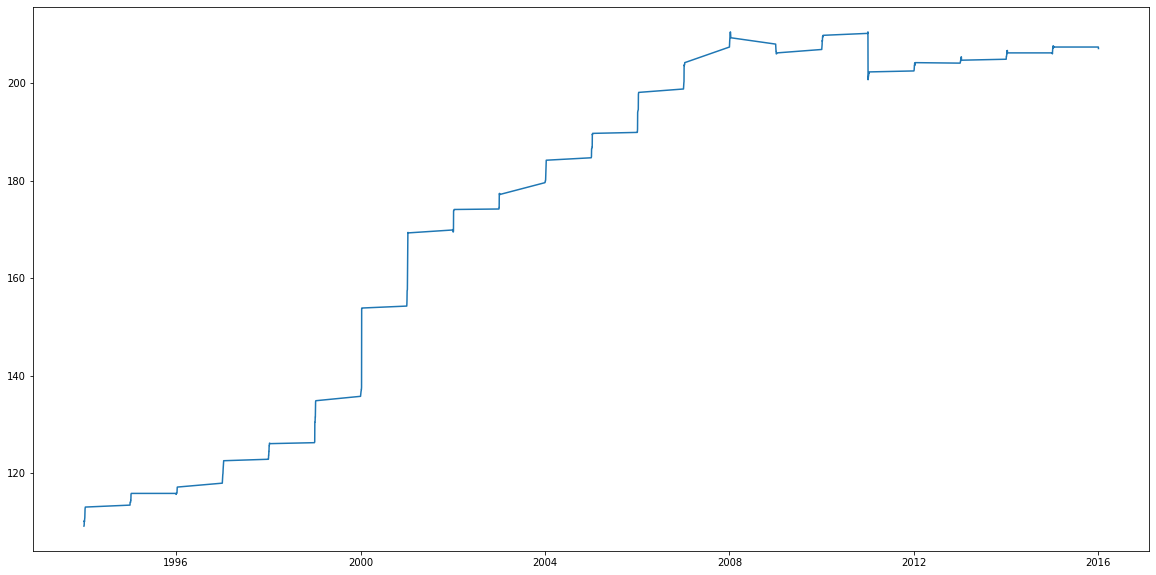

In [64]:
plt.plot(df["Cost"],label='Cost Price History')

In [69]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Cost'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Cost"][i]=df["Cost"][i]
data.head()

,Date,Cost
0,1994-01-01 00:00:00,109.2
1,1994-01-02 00:00:00,109.3
2,1994-01-03 00:00:00,109.4
3,1994-01-04 00:00:00,110.3
4,1994-01-05 00:00:00,110.1


In [66]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop("Date",axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [47]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [57]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')

X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]))


In [73]:
df.shape

(266, 2)

In [55]:
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

ValueError: ignored